- 참고 

    - raw_data(csv들) concat한 피클 -> nowonstation.pickle
    - 노원구 365일 평균 -> nowon_mean.pickle
    - 최종 결과물 -> nowon_365.pickle 

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
import os
import datetime

In [2]:
gu = ['종로구', '노원구']
path = 'C:/Users/user/Finance/bigcon/데이터/환경기상데이터/' 
colnames = ['pm10', 'pm25']

In [3]:
#노원구
nowon_mno = []
#파일 이름을 불러온다
for root, dirs, files in os.walk(path+gu[1]):
    for file in files:
        nowon_mno.append(file)

print(nowon_mno)

['V10O1610102.csv', 'V10O1610200.csv', 'V10O1610293.csv', 'V10O1610297.csv', 'V10O1610312.csv', 'V10O1610351.csv', 'V10O1610356.csv', 'V10O1610376.csv', 'V10O1610610.csv', 'V10O1610616.csv', 'V10O1610629.csv', 'V10O1610630.csv', 'V10O1610642.csv', 'V10O1610643.csv', 'V10O1611097.csv', 'V10O1611100.csv', 'V10O1611102.csv', 'V10O1611104.csv', 'V10O1611150.csv', 'V10O1611229.csv', 'V10O1611652.csv', 'V10O1612126.csv']


In [4]:
# concat한 pickle 불러오기
nowonstation = pd.read_pickle("./nowonstation.pickle")
nowonstation

serial                    V10O1610102  V10O1610200  V10O1610293  V10O1610297  \
tm                                                                             
2018-04-01 00:00:00 pm10          NaN         80.0         67.0         53.0   
                    pm25          NaN         48.0         40.0         32.0   
2018-04-01 00:01:00 pm10          NaN         74.0         61.0         66.0   
                    pm25          NaN         45.0         37.0         40.0   
2018-04-01 00:02:00 pm10          NaN         69.0         56.0         68.0   
...                               ...          ...          ...          ...   
2019-03-31 23:57:00 pm25         14.0          NaN         26.0          NaN   
2019-03-31 23:58:00 pm10         31.0          NaN         37.0          NaN   
                    pm25         20.0          NaN         24.0          NaN   
2019-03-31 23:59:00 pm10         45.0          NaN         38.0          NaN   
                    pm25         30.0          NaN         25.0          NaN   

serial                    V10O1610312  V10O1610351  V10O1610356  V10O1610376  \
tm                                                                             
2018-04-01 00:00:00 pm10          NaN          NaN         26.0         59.0   
                    pm25          NaN          NaN         10.0         35.0   
2018-04-01 00:01:00 pm10          NaN          NaN         30.0         63.0   
                    pm25          NaN          NaN         12.0         38.0   
2018-04-01 00:02:00 pm10          NaN          NaN         32.0         55.0   
...                               ...          ...          ...          ...   
2019-03-31 23:57:00 pm25         21.0         20.0         21.0         19.0   
2019-03-31 23:58:00 pm10         14.0         19.0         30.0         34.0   
                    pm25          9.0         12.0         20.0         22.0   
2019-03-31 23:59:00 pm10         27.0         37.0         34.0         29.0   
                    pm25         18.0         24.0         23.0         19.0   

serial                    V10O1610610  V10O1610616  ...  V10O1610642  \
tm                                                  ...                
2018-04-01 00:00:00 pm10         39.0         54.0  ...         41.0   
                    pm25         19.0         32.0  ...         20.0   
2018-04-01 00:01:00 pm10         37.0         74.0  ...         42.0   
                    pm25         18.0         45.0  ...         21.0   
2018-04-01 00:02:00 pm10         40.0         77.0  ...         38.0   
...                               ...          ...  ...          ...   
2019-03-31 23:57:00 pm25          NaN         28.0  ...         24.0   
2019-03-31 23:58:00 pm10          NaN         30.0  ...         29.0   
                    pm25          NaN         20.0  ...         19.0   
2019-03-31 23:59:00 pm10          NaN         24.0  ...         28.0   
                    pm25          NaN         16.0  ...         18.0   

serial                    V10O1610643  V10O1611097  V10O1611100  V10O1611102  \
tm                                                                             
2018-04-01 00:00:00 pm10         27.0        102.0        114.0         58.0   
                    pm25         13.0         62.0         69.0         35.0   
2018-04-01 00:01:00 pm10         29.0         78.0         94.0         51.0   
                    pm25         14.0         47.0         57.0         31.0   
2018-04-01 00:02:00 pm10         27.0         56.0         84.0         61.0   
...                               ...          ...          ...          ...   
2019-03-31 23:57:00 pm25         26.0         21.0         18.0         17.0   
2019-03-31 23:58:00 pm10         26.0         33.0         19.0         27.0   
                    pm25         17.0         22.0         12.0         18.0   
2019-03-31 23:59:00 pm10         16.0         24.0         17.0         25.0   
                    p

In [5]:
#tm --> 날짜 / 시간 split 
nowonstation = nowonstation.reset_index()
nowonstation['tm'] = pd.to_datetime(nowonstation.tm, format="%Y%m%d%H%M")
nowonstation = nowonstation.rename(columns={'level_1':'pm'})

nowonstation['date'] = pd.to_datetime(nowonstation['tm']).dt.date
nowonstation['time'] = pd.to_datetime(nowonstation['tm']).dt.time
nowonstation = nowonstation.set_index(['date', 'time', 'pm'])
nowonstation

serial                                    tm  V10O1610102  V10O1610200  \
date       time     pm                                                   
2018-04-01 00:00:00 pm10 2018-04-01 00:00:00          NaN         80.0   
                    pm25 2018-04-01 00:00:00          NaN         48.0   
           00:01:00 pm10 2018-04-01 00:01:00          NaN         74.0   
                    pm25 2018-04-01 00:01:00          NaN         45.0   
           00:02:00 pm10 2018-04-01 00:02:00          NaN         69.0   
...                                      ...          ...          ...   
2019-03-31 23:57:00 pm25 2019-03-31 23:57:00         14.0          NaN   
           23:58:00 pm10 2019-03-31 23:58:00         31.0          NaN   
                    pm25 2019-03-31 23:58:00         20.0          NaN   
           23:59:00 pm10 2019-03-31 23:59:00         45.0          NaN   
                    pm25 2019-03-31 23:59:00         30.0          NaN   

serial                    V10O1610293  V10O1610297  V10O1610312  V10O1610351  \
date       time     pm                                                         
2018-04-01 00:00:00 pm10         67.0         53.0          NaN          NaN   
                    pm25         40.0         32.0          NaN          NaN   
           00:01:00 pm10         61.0         66.0          NaN          NaN   
                    pm25         37.0         40.0          NaN          NaN   
           00:02:00 pm10         56.0         68.0          NaN          NaN   
...                               ...          ...          ...          ...   
2019-03-31 23:57:00 pm25         26.0          NaN         21.0         20.0   
           23:58:00 pm10         37.0          NaN         14.0         19.0   
                    pm25         24.0          NaN          9.0         12.0   
           23:59:00 pm10         38.0          NaN         27.0         37.0   
                    pm25         25.0          NaN         18.0         24.0   

serial                    V10O1610356  V10O1610376  V10O1610610  ...  \
date       time     pm                                           ...   
2018-04-01 00:00:00 pm10         26.0         59.0         39.0  ...   
                    pm25         10.0         35.0         19.0  ...   
           00:01:00 pm10         30.0         63.0         37.0  ...   
                    pm25         12.0         38.0         18.0  ...   
           00:02:00 pm10         32.0         55.0         40.0  ...   
...                               ...          ...          ...  ...   
2019-03-31 23:57:00 pm25         21.0         19.0          NaN  ...   
           23:58:00 pm10         30.0         34.0          NaN  ...   
                    pm25         20.0         22.0          NaN  ...   
           23:59:00 pm10         34.0         29.0          NaN  ...   
                    pm25         23.0         19.0          NaN  ...   

serial                    V10O1610642  V10O1610643  V10O1611097  V10O1611100  \
date       time     pm                                                         
2018-04-01 00:00:00 pm10         41.0         27.0        102.0        114.0   
                    pm25         20.0         13.0         62.0         69.0   
           00:01:00 pm10         42.0         29.0         78.0         94.0   
                    pm25         21.0         14.0         47.0         57.0   
           00:02:00 pm10         38.0         27.0         56.0         84.0   
...                               ...          ...          ...          ...   
2019-03-31 23:57:00 pm25         24.0         26.0         21.0         18.0   
           23:58:00 pm10         29.0         26.0         33.0         19.0   
                    pm25         19.0         17.0         22.0         12.0   
           23:59:00 pm10         28.0         16.0         24.0         17.0   
                    pm25         18.0         10.0         16.0         11.0   

serial            

1. 활동 시간(체감시간) 적용 -> 05:00~ 23:59 

In [6]:
nowonstation = nowonstation.reset_index()
nowonstation = nowonstation[nowonstation.time > datetime.time(4, 59)]
nowonstation = nowonstation.set_index(['tm','date', 'time', 'pm'])
nowonstation.tail()

serial                                        V10O1610102  V10O1610200  \
tm                  date       time     pm                               
2019-03-31 23:57:00 2019-03-31 23:57:00 pm25         14.0          NaN   
2019-03-31 23:58:00 2019-03-31 23:58:00 pm10         31.0          NaN   
                                        pm25         20.0          NaN   
2019-03-31 23:59:00 2019-03-31 23:59:00 pm10         45.0          NaN   
                                        pm25         30.0          NaN   

serial                                        V10O1610293  V10O1610297  \
tm                  date       time     pm                               
2019-03-31 23:57:00 2019-03-31 23:57:00 pm25         26.0          NaN   
2019-03-31 23:58:00 2019-03-31 23:58:00 pm10         37.0          NaN   
                                        pm25         24.0          NaN   
2019-03-31 23:59:00 2019-03-31 23:59:00 pm10         38.0          NaN   
                                        pm25         25.0          NaN   

serial                                        V10O1610312  V10O1610351  \
tm                  date       time     pm                               
2019-03-31 23:57:00 2019-03-31 23:57:00 pm25         21.0         20.0   
2019-03-31 23:58:00 2019-03-31 23:58:00 pm10         14.0         19.0   
                                        pm25          9.0         12.0   
2019-03-31 23:59:00 2019-03-31 23:59:00 pm10         27.0         37.0   
                                        pm25         18.0         24.0   

serial                                        V10O1610356  V10O1610376  \
tm                  date       time     pm                               
2019-03-31 23:57:00 2019-03-31 23:57:00 pm25         21.0         19.0   
2019-03-31 23:58:00 2019-03-31 23:58:00 pm10         30.0         34.0   
                                        pm25         20.0         22.0   
2019-03-31 23:59:00 2019-03-31 23:59:00 pm10         34.0         29.0   
                                        pm25         23.0         19.0   

serial                                        V10O1610610  V10O1610616  ...  \
tm                  date       time     pm                              ...   
2019-03-31 23:57:00 2019-03-31 23:57:00 pm25          NaN         28.0  ...   
2019-03-31 23:58:00 2019-03-31 23:58:00 pm10          NaN         30.0  ...   
                                        pm25          NaN         20.0  ...   
2019-03-31 23:59:00 2019-03-31 23:59:00 pm10          NaN         24.0  ...   
                                        pm25          NaN         16.0  ...   

serial                                        V10O1610642  V10O1610643  \
tm                  date       time     pm                               
2019-03-31 23:57:00 2019-03-31 23:57:00 pm25         24.0         26.0   
2019-03-31 23:58:00 2019-03-31 23:58:00 pm10         29.0         26.0   
                                        pm25         19.0         17.0   
2019-03-31 23:59:00 2019-03-31 23:59:00 pm10         28.0         16.0   
                                        pm25         18.0         10.0   

serial                                        V10O1611097  V10O1611100  \
tm                  date       time     pm                               
2019-03-31 23:57:00 2019-03-31 23:57:00 pm25         21.0         18.0   
2019-03-31 23:58:00 2019-03-31 23:58:00 pm10         33.0         19.0   
                                        pm25         22.0         12.0   
2019-03-31 23:59:00 2019-03-31 23:59:00 pm10         24.0         17.0   
                                        pm25         16.0         11.0   

serial                                        V10O1611102  V10O1611104  \
tm                  date       time     pm                               
2019-03-31 23:57:00 2019-03-31 23:57:00 pm25         17.0         22.0   
2019-03-31 23:58:00 2019-03-31 23:58:00 pm10         27.0         27.0   
                                    

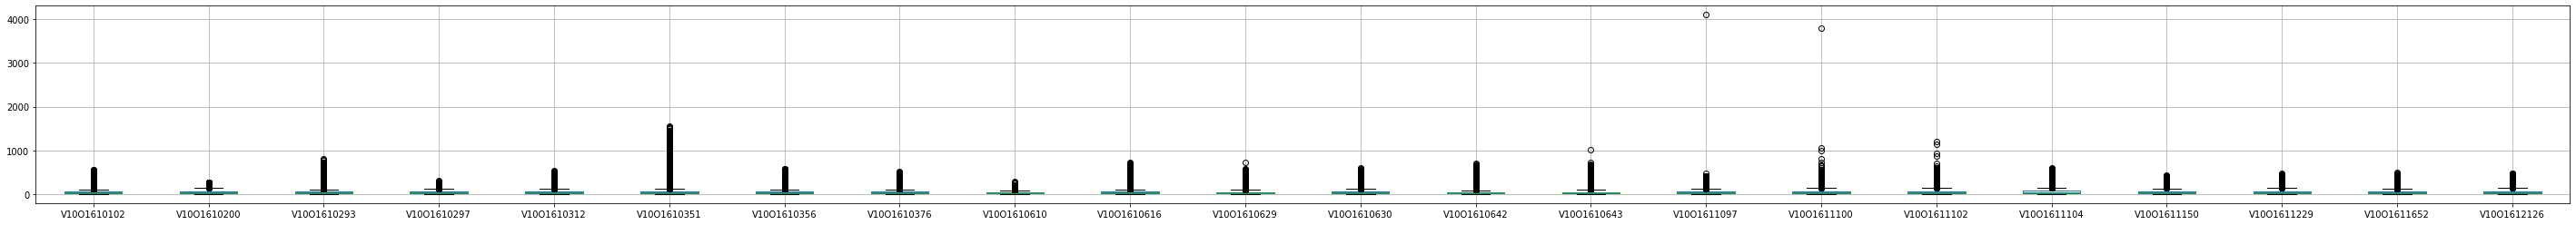

In [7]:
# 이상치 확인 
%matplotlib inline
import matplotlib.pylab as plt

plt.rcParams["figure.figsize"] = (50,4)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'r'
plt.rcParams['axes.grid'] = True 
nowonstation.boxplot()

In [8]:
#(빅콘사이트에 공지된)이상치 처리 (=>1분전과 1분후의 중간값으로 바꿔줌)
nowonstation= nowonstation.reset_index()

print(nowonstation['V10O1611097'].max(),'->', end="")
i = nowonstation['V10O1611097'].idxmax()
nowonstation['V10O1611097'][i] = round((nowonstation['V10O1611097'][i-2]+
                                   nowonstation['V10O1611097'][i+2])/2)
print(nowonstation['V10O1611097'][i])
#####################
print(nowonstation['V10O1611100'].max(),'->', end="")
i = nowonstation['V10O1611100'].idxmax()
nowonstation['V10O1611100'][i] = round((nowonstation['V10O1611100'][i-2]+
                                   nowonstation['V10O1611100'][i+2])/2)
print(nowonstation['V10O1611100'][i])
####################
print(nowonstation['V10O1611100'].max(),'->', end="")
i = nowonstation['V10O1611100'].idxmax()
nowonstation['V10O1611100'][i] = round((nowonstation['V10O1611100'][i-2]+
                                   nowonstation['V10O1611100'][i+2])/2)
print(nowonstation['V10O1611100'][i])

4104.0 ->14.0
3803.0 ->14.0
1057.0 ->66.0


C:\Users\user\Anaconda3\envs\finance\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\user\Anaconda3\envs\finance\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\Users\user\Anaconda3\envs\finance\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


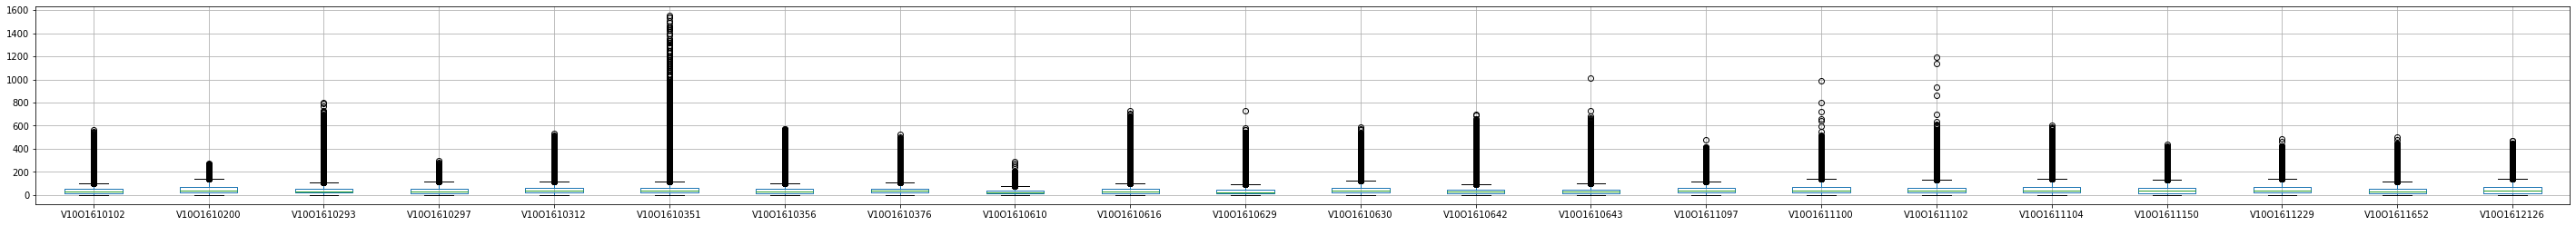

In [9]:
#이상치 처리 후 
plt.rcParams["figure.figsize"] = (50,4)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'r'
plt.rcParams['axes.grid'] = True 
nowonstation.boxplot()

2. 시간 당 미세먼지 평균 농도 

In [10]:
nowonstation = nowonstation.reset_index()
nowonstation['hour'] = pd.to_datetime(nowonstation['tm']).dt.hour
nowonstation

serial,index,tm,date,time,pm,V10O1610102,V10O1610200,V10O1610293,V10O1610297,V10O1610312,...,V10O1610643,V10O1611097,V10O1611100,V10O1611102,V10O1611104,V10O1611150,V10O1611229,V10O1611652,V10O1612126,hour
0,0,2018-04-01 05:00:00,2018-04-01,05:00:00,pm10,NaN,60.0,62.0,66.0,49.0,...,27.0,66.0,51.0,56.0,78.0,75.0,61.0,56.0,70.0,5
1,1,2018-04-01 05:00:00,2018-04-01,05:00:00,pm25,NaN,34.0,35.0,38.0,24.0,...,13.0,38.0,29.0,32.0,45.0,43.0,34.0,32.0,35.0,5
2,2,2018-04-01 05:01:00,2018-04-01,05:01:00,pm10,NaN,63.0,62.0,72.0,54.0,...,21.0,55.0,97.0,65.0,79.0,57.0,39.0,29.0,1.0,5
3,3,2018-04-01 05:01:00,2018-04-01,05:01:00,pm25,NaN,36.0,35.0,41.0,27.0,...,10.0,31.0,56.0,37.0,45.0,33.0,22.0,16.0,1.0,5
4,4,2018-04-01 05:02:00,2018-04-01,05:02:00,pm10,NaN,49.0,56.0,64.0,59.0,...,23.0,41.0,33.0,54.0,58.0,74.0,51.0,49.0,71.0,5
5,5,2018-04-01 05:02:00,2018-04-01,05:02:00,pm25,NaN,28.0,32.0,37.0,30.0,...,11.0,23.0,19.0,31.0,33.0,42.0,29.0,28.0,36.0,5
6,6,2018-04-01 05:03:00,2018-04-01,05:03:00,pm10,NaN,73.0,59.0,72.0,59.0,...,28.0,40.0,44.0,64.0,85.0,67.0,62.0,57.0,60.0,5
7,7,2018-04-01 05:03:00,2018-04-01,05:03:00,pm25,NaN,42.0,34.0,41.0,30.0,...,14.0,23.0,25.0,37.0,49.0,38.0,35.0,33.0,30.0,5
8,8,2018-04-01 05:04:00,2018-04-01,05:04:00,pm10,NaN,72.0,59.0,68.0,69.0,...,32.0,65.0,50.0,29.0,59.0,63.0,63.0,37.0,76.0,5
9,9,2018-04-01 05:04:00,2018-04-01,05:04:00,pm25,NaN,41.0,34.0,39.0,35.0,...,16.0,37.0,28.0,16.0,34.0,36.0,35.0,21.0,38.0,5


In [11]:
nowonstation_hour = nowonstation.groupby(['date','hour','pm']).mean().round(1)
nowonstation_hour

serial                 index  V10O1610102  V10O1610200  V10O1610293  \
date       hour pm                                                    
2018-04-01 5    pm10      59          NaN         68.6         62.0   
                pm25      60          NaN         38.3         34.5   
           6    pm10     179          NaN         68.8         61.6   
                pm25     180          NaN         38.2         34.1   
           7    pm10     299          NaN         69.0         64.6   
...                      ...          ...          ...          ...   
2019-03-31 21   pm25  831900         18.1          NaN         18.4   
           22   pm10  832019         27.2          NaN         28.8   
                pm25  832020         19.2          NaN         20.4   
           23   pm10  832139         28.0          NaN         31.0   
                pm25  832140         18.1          NaN         20.1   

serial                V10O1610297  V10O1610312  V10O1610351  V10O1610356  \
date       hour pm                                                         
2018-04-01 5    pm10         67.5         54.4          NaN         40.4   
                pm25         37.7         27.9          NaN         16.7   
           6    pm10         69.6         56.6          NaN         54.3   
                pm25         38.6         29.4          NaN         22.1   
           7    pm10         69.0         57.8          NaN         55.6   
...                           ...          ...          ...          ...   
2019-03-31 21   pm25          NaN         20.0         15.2         11.6   
           22   pm10          NaN         26.5         22.0         22.0   
                pm25          NaN         18.7         15.4          9.9   
           23   pm10          NaN         26.5         22.7         23.8   
                pm25          NaN         17.1         14.6         10.9   

serial                V10O1610376  V10O1610610  ...  V10O1610642  V10O1610643  \
date       hour pm                              ...                             
2018-04-01 5    pm10         57.3         36.0  ...         45.4         32.0   
                pm25         31.9         18.9  ...         24.0         16.8   
           6    pm10         60.8         42.6  ...         50.8         37.4   
                pm25         33.5         23.4  ...         27.9         20.5   
           7    pm10         62.2         37.4  ...         46.2         34.2   
...                           ...          ...  ...          ...          ...   
2019-03-31 21   pm25         18.3          NaN  ...         19.5         14.4   
           22   pm10         24.2          NaN  ...         26.8         19.0   
                pm25         17.0          NaN  ...         18.9         13.3   
           23   pm10         27.7          NaN  ...         29.9         21.4   
                pm25         17.9          NaN  ...         19.3         13.7   

serial                V10O1611097  V10O1611100  V10O1611102  V10O1611104  \
date       hour pm                                                         
2018-04-01 5    pm10         52.2         65.8         51.2         60.6   
                pm25         29.1         36.7         28.4         33.8   
           6    pm10         56.4         73.8         53.8         62.4   
                pm25         31.2         40.9         29.8         34.7   
           7    pm10         53.4         76.7         61.2         64.1   
...                           ...          ...          ...          ...   
2019-03-31 21   pm25         20.0         18.2         17.1         18.9   
           22   pm10         27.5         25.4         23.4         28.0   
                pm25         19.3         17.9         16.6         19.9   
           23   pm10         27.0         26.9         24.8         27.9   
                pm25         17.5         17.4         16.1         18.1   

serial                V10O1611150  V10O16112

3. 미세먼지 클래스 분류 [0(좋음),1(보통),2(나쁨),3(매우나쁨)]

In [12]:
#pm 10 classification
nowonstation_hour = nowonstation_hour.reset_index(level = [0,1,2])
pm10 = nowonstation_hour.loc[nowonstation_hour['pm']=='pm10']
pm10.drop(['pm'], axis='columns', inplace=True)
pm10 = pm10.set_index(['date', 'hour'])

pm10_max = pd.DataFrame(pm10.T.stack(0).stack()).reset_index()
pm10_max = pm10_max[pm10_max['serial']!='index']
pm10_max.columns = ['serial','date','hour','pm10'] 
pm10_max_2= pm10_max  #뒤에서 쓰려고 저장
pm10_max = pm10_max.groupby(['serial','date']).max() # 일별 최대값을 그날의 대표값으로 지정

pm10_max['pm10_class'] = 1  #default 값 1(보통)
pm10_max 

a10 = pm10_max.reset_index(level=[0,1])
a10.loc[a10['pm10']< 31.0 , 'pm10_class'] = 0                           # 좋음(0): 0 < pm10 < 30
a10.loc[(a10['pm10']< 81.0) & (a10['pm10'] >= 31.0), 'pm10_class'] = 1    # 보통(1) :31 < pm10 < 80
a10.loc[(a10['pm10']< 151.0) & (a10['pm10']>= 81.0) , 'pm10_class'] = 2   # 나쁨(2): 81 < pm10 < 150
a10.loc[a10['pm10']>= 151.0 , 'pm10_class'] = 3                         # 매우나쁨(3): pm10 >= 151
a10

C:\Users\user\Anaconda3\envs\finance\lib\site-packages\pandas\core\frame.py:4097: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,serial,date,hour,pm10,pm10_class
0,V10O1610102,2018-05-07,23,95.6,2
1,V10O1610102,2018-05-10,23,102.3,2
2,V10O1610102,2018-05-11,23,158.5,3
3,V10O1610102,2018-05-12,23,89.0,2
4,V10O1610102,2018-05-13,23,54.3,1
5,V10O1610102,2018-05-14,23,124.9,2
6,V10O1610102,2018-05-15,23,145.2,2
7,V10O1610102,2018-05-16,23,68.7,1
8,V10O1610102,2018-05-17,23,30.6,0
9,V10O1610102,2018-05-18,23,16.9,0


In [13]:
nowonstation_hour

serial,date,hour,pm,index,V10O1610102,V10O1610200,V10O1610293,V10O1610297,V10O1610312,V10O1610351,...,V10O1610642,V10O1610643,V10O1611097,V10O1611100,V10O1611102,V10O1611104,V10O1611150,V10O1611229,V10O1611652,V10O1612126
0,2018-04-01,5,pm10,59,NaN,68.6,62.0,67.5,54.4,NaN,...,45.4,32.0,52.2,65.8,51.2,60.6,65.7,62.8,51.0,74.9
1,2018-04-01,5,pm25,60,NaN,38.3,34.5,37.7,27.9,NaN,...,24.0,16.8,29.1,36.7,28.4,33.8,36.7,34.3,28.4,39.6
2,2018-04-01,6,pm10,179,NaN,68.8,61.6,69.6,56.6,NaN,...,50.8,37.4,56.4,73.8,53.8,62.4,65.0,71.8,49.5,79.6
3,2018-04-01,6,pm25,180,NaN,38.2,34.1,38.6,29.4,NaN,...,27.9,20.5,31.2,40.9,29.8,34.7,35.9,41.0,27.3,43.6
4,2018-04-01,7,pm10,299,NaN,69.0,64.6,69.0,57.8,NaN,...,46.2,34.2,53.4,76.7,61.2,64.1,65.2,79.8,58.1,81.9
5,2018-04-01,7,pm25,300,NaN,40.3,37.6,40.3,28.6,NaN,...,23.5,17.4,31.0,44.9,35.6,37.3,38.1,51.4,33.8,41.8
6,2018-04-01,8,pm10,419,NaN,71.0,71.7,72.0,58.8,NaN,...,62.8,52.0,54.0,74.2,66.7,67.7,71.0,61.9,61.3,83.8
7,2018-04-01,8,pm25,420,NaN,42.6,43.0,43.2,28.8,NaN,...,32.3,26.4,32.4,44.3,39.6,40.7,42.7,35.9,36.7,43.3
8,2018-04-01,9,pm10,539,NaN,77.9,77.9,80.0,67.0,NaN,...,66.2,51.5,61.2,87.0,64.0,73.3,78.0,64.8,70.5,95.9
9,2018-04-01,9,pm25,540,NaN,46.4,46.5,47.8,31.8,NaN,...,30.5,23.6,36.2,51.9,37.9,43.3,46.3,32.8,41.8,44.5


In [14]:
#pm25 classification

pm25 = nowonstation_hour.loc[nowonstation_hour['pm']=='pm25']
pm25.drop(['pm'], axis='columns', inplace=True)
pm25 = pm25.set_index(['date', 'hour'])
del pm25['index']
pm25_max = pd.DataFrame(pm25.T.stack(0).stack()).reset_index()
pm25_max_2= pm25_max #뒤에서 쓰려고 저장
pm25_max = pm25_max.groupby(['serial','date']).max() # 일별 최대값을 그날의 대표값으로 지정
pm25_max.columns = ['hour','pm25']  

pm25_max['pm25_class'] = 1  # class =1(보통)

a25 = pm25_max.reset_index(level=[0,1])
a25.loc[a25['pm25']< 16.0 , 'pm25_class'] = 0
a25.loc[(a25['pm25']< 36.0) & (a25['pm25'] >= 16.0), 'pm25_class'] = 1
a25.loc[(a25['pm25']< 76.0) & (a25['pm25'] >= 36.0) , 'pm25_class'] = 2
a25.loc[a25['pm25']>= 76.0 , 'pm25_class'] = 3
a25 = a25.iloc[:,3:]
a25

,pm25,pm25_class
0,43.5,2
1,66.5,2
2,93.7,3
3,52.9,2
4,43.6,2
5,85.3,3
6,120.7,3
7,45.2,2
8,17.2,1
9,6.1,0


In [15]:
a1025 = [a10,a25]
pm_max = pd.concat(a1025, axis=1)
del pm_max['hour'] 
pm_max  #pm10과 pm25에 대해 class 분류 한 것을 합침

,serial,date,pm10,pm10_class,pm25,pm25_class
0,V10O1610102,2018-05-07,95.6,2,43.5,2
1,V10O1610102,2018-05-10,102.3,2,66.5,2
2,V10O1610102,2018-05-11,158.5,3,93.7,3
3,V10O1610102,2018-05-12,89.0,2,52.9,2
4,V10O1610102,2018-05-13,54.3,1,43.6,2
5,V10O1610102,2018-05-14,124.9,2,85.3,3
6,V10O1610102,2018-05-15,145.2,2,120.7,3
7,V10O1610102,2018-05-16,68.7,1,45.2,2
8,V10O1610102,2018-05-17,30.6,0,17.2,1
9,V10O1610102,2018-05-18,16.9,0,6.1,0


In [16]:
# pm10과 pm25중 더 안좋은것을 기준으로 그날의 pm class 결정 
pm_max.loc[pm_max['pm10_class']< pm_max['pm25_class'] , 'pm_class'] = pm_max['pm25_class']
pm_max.loc[pm_max['pm10_class']< pm_max['pm25_class'] , 'pm_class_info'] ='pm25'

pm_max.loc[pm_max['pm10_class']>= pm_max['pm25_class'] , 'pm_class'] = pm_max['pm10_class']
pm_max.loc[pm_max['pm10_class']>= pm_max['pm25_class'] , 'pm_class_info'] ='pm10'

pm_max['pm10_class'] = pm_max['pm10_class'].astype('int').astype('category')
pm_max['pm25_class'] = pm_max['pm25_class'].astype('int').astype('category')
pm_max['pm_class'] = pm_max['pm_class'].astype('int')
pm_max['pm_class_info'] = pm_max['pm_class_info'].astype('category')
pm_max

,serial,date,pm10,pm10_class,pm25,pm25_class,pm_class,pm_class_info
0,V10O1610102,2018-05-07,95.6,2,43.5,2,2,pm10
1,V10O1610102,2018-05-10,102.3,2,66.5,2,2,pm10
2,V10O1610102,2018-05-11,158.5,3,93.7,3,3,pm10
3,V10O1610102,2018-05-12,89.0,2,52.9,2,2,pm10
4,V10O1610102,2018-05-13,54.3,1,43.6,2,2,pm25
5,V10O1610102,2018-05-14,124.9,2,85.3,3,3,pm25
6,V10O1610102,2018-05-15,145.2,2,120.7,3,3,pm25
7,V10O1610102,2018-05-16,68.7,1,45.2,2,2,pm25
8,V10O1610102,2018-05-17,30.6,0,17.2,1,1,pm25
9,V10O1610102,2018-05-18,16.9,0,6.1,0,0,pm10


In [17]:
#pm10시간당 평균농도
pm10_max_2.columns =['serial', 'date', 'hour', 'pm10'] #미리 위에서 저장했었음
pm10_max_2 

,serial,date,hour,pm10
6935,V10O1610102,2018-05-07,17,73.9
6936,V10O1610102,2018-05-07,18,78.3
6937,V10O1610102,2018-05-07,19,85.4
6938,V10O1610102,2018-05-07,20,92.4
6939,V10O1610102,2018-05-07,21,95.6
6940,V10O1610102,2018-05-07,22,80.9
6941,V10O1610102,2018-05-07,23,72.3
6942,V10O1610102,2018-05-10,5,37.9
6943,V10O1610102,2018-05-10,6,34.4
6944,V10O1610102,2018-05-10,7,49.6


In [18]:
#pm10이 150이상인 날(point1)
pm150 = pm10_max_2[pm10_max_2['pm10']>150].reset_index(drop=True)
del pm150['pm10']
pm150

,serial,date,hour
0,V10O1610102,2018-05-11,15
1,V10O1610102,2018-10-15,20
2,V10O1610102,2018-11-06,13
3,V10O1610102,2018-11-06,14
4,V10O1610102,2018-11-06,19
5,V10O1610102,2018-11-06,20
6,V10O1610102,2018-11-11,12
7,V10O1610102,2018-11-27,18
8,V10O1610102,2018-11-27,19
9,V10O1610102,2018-11-27,20


In [19]:
# point2: 하루에 한번만 기준치 넘었으면 제외
# 일별 기준치 넘은 hour의 횟수 hour_cnt
hour_cnt = pd.DataFrame(pm150.groupby([pm150['serial'],pm150['date']], axis=0).count()['hour']) 
hour_cnt = hour_cnt[hour_cnt>1] 
hour_cnt =hour_cnt.dropna()
hour_cnt= hour_cnt.reset_index()
hour_cnt.columns=['serial', 'date', 'hour_cnt']
hour_cnt

,serial,date,hour_cnt
0,V10O1610102,2018-11-06,4.0
1,V10O1610102,2018-11-27,6.0
2,V10O1610102,2018-11-28,5.0
3,V10O1610102,2018-11-29,2.0
4,V10O1610102,2019-01-05,2.0
5,V10O1610102,2019-01-12,4.0
6,V10O1610102,2019-01-13,12.0
7,V10O1610102,2019-01-14,19.0
8,V10O1610102,2019-01-15,10.0
9,V10O1610102,2019-02-07,2.0


In [20]:
# hour_cnt에 해당하는 시간을 보기 위해 merge 함
over_pm10 = pd.merge(hour_cnt, pm150, how='left')
over_pm10 = over_pm10.set_index(['serial','date','hour_cnt','hour'])
over_pm10

Empty DataFrame
Columns: []
Index: [(V10O1610102, 2018-11-06 00:00:00, 4.0, 13), (V10O1610102, 2018-11-06 00:00:00, 4.0, 14), (V10O1610102, 2018-11-06 00:00:00, 4.0, 19), (V10O1610102, 2018-11-06 00:00:00, 4.0, 20), (V10O1610102, 2018-11-27 00:00:00, 6.0, 18), (V10O1610102, 2018-11-27 00:00:00, 6.0, 19), (V10O1610102, 2018-11-27 00:00:00, 6.0, 20), (V10O1610102, 2018-11-27 00:00:00, 6.0, 21), (V10O1610102, 2018-11-27 00:00:00, 6.0, 22), (V10O1610102, 2018-11-27 00:00:00, 6.0, 23), (V10O1610102, 2018-11-28 00:00:00, 5.0, 5), (V10O1610102, 2018-11-28 00:00:00, 5.0, 6), (V10O1610102, 2018-11-28 00:00:00, 5.0, 7), (V10O1610102, 2018-11-28 00:00:00, 5.0, 8), (V10O1610102, 2018-11-28 00:00:00, 5.0, 9), (V10O1610102, 2018-11-29 00:00:00, 2.0, 15), (V10O1610102, 2018-11-29 00:00:00, 2.0, 16), (V10O1610102, 2019-01-05 00:00:00, 2.0, 5), (V10O1610102, 2019-01-05 00:00:00, 2.0, 6), (V10O1610102, 2019-01-12 00:00:00, 4.0, 10), (V10O1610102, 2019-01-12 00:00:00, 4.0, 11), (V10O1610102, 2019-01-12 00:00:00, 4.0, 12), (V10O1610102, 2019-01-12 00:00:00, 4.0, 13), (V10O1610102, 2019-01-13 00:00:00, 12.0, 10), (V10O1610102, 2019-01-13 00:00:00, 12.0, 11), (V10O1610102, 2019-01-13 00:00:00, 12.0, 12), (V10O1610102, 2019-01-13 00:00:00, 12.0, 13), (V10O1610102, 2019-01-13 00:00:00, 12.0, 14), (V10O1610102, 2019-01-13 00:00:00, 12.0, 17), (V10O1610102, 2019-01-13 00:00:00, 12.0, 18), (V10O1610102, 2019-01-13 00:00:00, 12.0, 19), (V10O1610102, 2019-01-13 00:00:00, 12.0, 20), (V10O1610102, 2019-01-13 00:00:00, 12.0, 21), (V10O1610102, 2019-01-13 00:00:00, 12.0, 22), (V10O1610102, 2019-01-13 00:00:00, 12.0, 23), (V10O1610102, 2019-01-14 00:00:00, 19.0, 5), (V10O1610102, 2019-01-14 00:00:00, 19.0, 6), (V10O1610102, 2019-01-14 00:00:00, 19.0, 7), (V10O1610102, 2019-01-14 00:00:00, 19.0, 8), (V10O1610102, 2019-01-14 00:00:00, 19.0, 9), (V10O1610102, 2019-01-14 00:00:00, 19.0, 10), (V10O1610102, 2019-01-14 00:00:00, 19.0, 11), (V10O1610102, 2019-01-14 00:00:00, 19.0, 12), (V10O1610102, 2019-01-14 00:00:00, 19.0, 13), (V10O1610102, 2019-01-14 00:00:00, 19.0, 14), (V10O1610102, 2019-01-14 00:00:00, 19.0, 15), (V10O1610102, 2019-01-14 00:00:00, 19.0, 16), (V10O1610102, 2019-01-14 00:00:00, 19.0, 17), (V10O1610102, 2019-01-14 00:00:00, 19.0, 18), (V10O1610102, 2019-01-14 00:00:00, 19.0, 19), (V10O1610102, 2019-01-14 00:00:00, 19.0, 20), (V10O1610102, 2019-01-14 00:00:00, 19.0, 21), (V10O1610102, 2019-01-14 00:00:00, 19.0, 22), (V10O1610102, 2019-01-14 00:00:00, 19.0, 23), (V10O1610102, 2019-01-15 00:00:00, 10.0, 5), (V10O1610102, 2019-01-15 00:00:00, 10.0, 6), (V10O1610102, 2019-01-15 00:00:00, 10.0, 7), (V10O1610102, 2019-01-15 00:00:00, 10.0, 8), (V10O1610102, 2019-01-15 00:00:00, 10.0, 9), (V10O1610102, 2019-01-15 00:00:00, 10.0, 10), (V10O1610102, 2019-01-15 00:00:00, 10.0, 11), (V10O1610102, 2019-01-15 00:00:00, 10.0, 12), (V10O1610102, 2019-01-15 00:00:00, 10.0, 13), (V10O1610102, 2019-01-15 00:00:00, 10.0, 14), (V10O1610102, 2019-02-07 00:00:00, 2.0, 5), (V10O1610102, 2019-02-07 00:00:00, 2.0, 6), (V10O1610102, 2019-02-20 00:00:00, 5.0, 19), (V10O1610102, 2019-02-20 00:00:00, 5.0, 20), (V10O1610102, 2019-02-20 00:00:00, 5.0, 21), (V10O1610102, 2019-02-20 00:00:00, 5.0, 22), (V10O1610102, 2019-02-20 00:00:00, 5.0, 23), (V10O1610102, 2019-02-21 00:00:00, 9.0, 5), (V10O1610102, 2019-02-21 00:00:00, 9.0, 6), (V10O1610102, 2019-02-21 00:00:00, 9.0, 7), (V10O1610102, 2019-02-21 00:00:00, 9.0, 8), (V10O1610102, 2019-02-21 00:00:00, 9.0, 9), (V10O1610102, 2019-02-21 00:00:00, 9.0, 10), (V10O1610102, 2019-02-21 00:00:00, 9.0, 13), (V10O1610102, 2019-02-21 00:00:00, 9.0, 14), (V10O1610102, 2019-02-21 00:00:00, 9.0, 18), (V10O1610102, 2019-02-22 00:00:00, 2.0, 9), (V10O1610102, 2019-02-22 00:00:00, 2.0, 11), (V10O1610102, 2019-02-25 00:00:00, 9.0, 5), (V10O1610102, 2019-02-25 00:00:00, 9.0, 6), (V10O1610102, 2019-02-25 00:00:00, 9.0, 7), (V10O1610102, 2019-02-25 00:00:00, 9.0, 8), (V10O1610102, 2019-02-25 00:00:00, 9.0, 9), (V10O1610102, 2019-02-25 00:00:00, 9.0

In [21]:
# point3: '연속' 개념 적용(시간의 차이가 1이 있는 date만 살리기)
over_pm10 = over_pm10.reset_index()
over_pm10['hour_sub'] = over_pm10['hour'] - over_pm10['hour'].shift(1) #시간차
over_pm10 = over_pm10[over_pm10['hour_sub']==1] #연속 
over_pm10 =over_pm10.set_index(['serial','date','hour_cnt','hour'])
over_pm10

hour_sub
serial      date       hour_cnt hour          
V10O1610102 2018-11-06 4.0      14         1.0
                                20         1.0
            2018-11-27 6.0      19         1.0
                                20         1.0
                                21         1.0
...                                        ...
V10O1612126 2019-03-06 17.0     19         1.0
                                20         1.0
                                21         1.0
                                22         1.0
                                23         1.0

[3320 rows x 1 columns]

In [22]:
##### pm10 기준치 초과로 재난문자 울린 day 뽑기
over_pm10 = over_pm10.reset_index()
pm10_msg_day= list(set(over_pm10['date'].dt.date)) # 재난문자 울린 day 목록
pm10_msg_day = pd.DataFrame(sorted(pm10_msg_day))
pm10_msg_day.columns=['date']
pm10_msg_day['msg_10'] =1
pm10_msg_day

,date,msg_10
0,2018-04-06,1
1,2018-04-11,1
2,2018-04-15,1
3,2018-04-18,1
4,2018-04-19,1
5,2018-04-20,1
6,2018-04-21,1
7,2018-04-27,1
8,2018-04-30,1
9,2018-05-01,1


- pm25 도 똑같이 진행

In [23]:
# pm25시간당 평균농도
pm25_max_2 = pm25_max_2.reset_index(drop =True)  #미리 위에서 저장했었음
pm25_max_2 = pm25_max_2.rename(columns={0:'pm25'})
pm25_max_2 = pm25_max_2[pm25_max_2['serial']!='index']
pm25_max_2

,serial,date,hour,pm25
0,V10O1610102,2018-05-07,17,24.7
1,V10O1610102,2018-05-07,18,28.4
2,V10O1610102,2018-05-07,19,34.1
3,V10O1610102,2018-05-07,20,39.8
4,V10O1610102,2018-05-07,21,43.5
5,V10O1610102,2018-05-07,22,36.6
6,V10O1610102,2018-05-07,23,31.7
7,V10O1610102,2018-05-10,5,19.5
8,V10O1610102,2018-05-10,6,17.5
9,V10O1610102,2018-05-10,7,27.6


In [24]:
# pm25 75이상인 날(point1)
pm75 = pm25_max_2[pm25_max_2['pm25']>75].reset_index(drop=True)
pm75

,serial,date,hour,pm25
0,V10O1610102,2018-05-11,5,88.1
1,V10O1610102,2018-05-11,6,81.7
2,V10O1610102,2018-05-11,8,80.8
3,V10O1610102,2018-05-11,9,80.1
4,V10O1610102,2018-05-11,12,93.7
5,V10O1610102,2018-05-11,13,77.9
6,V10O1610102,2018-05-11,14,81.3
7,V10O1610102,2018-05-11,15,78.7
8,V10O1610102,2018-05-11,16,77.9
9,V10O1610102,2018-05-11,17,79.6


In [25]:
# point2: 하루에 한번만 기준치 넘었으면 제외
# 일별 기준치 넘은 hour의 횟수 hour_cnt
hour_cnt = pd.DataFrame(pm75.groupby([pm75['serial'],pm75['date']], axis=0).count()['hour']) # 일별 기준치 넘은 hour의 횟수
hour_cnt = hour_cnt[hour_cnt>1] # 한시간 제외
hour_cnt =hour_cnt.dropna()
hour_cnt= hour_cnt.reset_index()
hour_cnt.columns=['serial', 'date', 'hour_cnt']
hour_cnt

,serial,date,hour_cnt
0,V10O1610102,2018-05-11,10.0
1,V10O1610102,2018-05-14,5.0
2,V10O1610102,2018-05-15,4.0
3,V10O1610102,2018-10-14,4.0
4,V10O1610102,2018-10-15,6.0
5,V10O1610102,2018-10-16,6.0
6,V10O1610102,2018-10-22,4.0
7,V10O1610102,2018-11-06,12.0
8,V10O1610102,2018-11-10,7.0
9,V10O1610102,2018-11-11,5.0


In [26]:
# hour_cnt에 해당하는 시간을 보기 위해 merge 함
over_pm25 = pd.merge(hour_cnt, pm75, how='left')
del over_pm25['pm25']
# over_pm25 = over_pm10.set_index(['serial','date','hour_cnt','hour'])
over_pm25

,serial,date,hour_cnt,hour
0,V10O1610102,2018-05-11,10.0,5
1,V10O1610102,2018-05-11,10.0,6
2,V10O1610102,2018-05-11,10.0,8
3,V10O1610102,2018-05-11,10.0,9
4,V10O1610102,2018-05-11,10.0,12
5,V10O1610102,2018-05-11,10.0,13
6,V10O1610102,2018-05-11,10.0,14
7,V10O1610102,2018-05-11,10.0,15
8,V10O1610102,2018-05-11,10.0,16
9,V10O1610102,2018-05-11,10.0,17


In [27]:
# point3: '연속' 개념 적용(시간의 차이가 1이 있는 date만 살리기)
over_pm25 = over_pm25.reset_index()
over_pm25['hour_sub'] = over_pm25['hour'] - over_pm25['hour'].shift(1) 
over_pm25 = over_pm25[over_pm25['hour_sub']==1] #연속 
over_pm25 =over_pm25.set_index(['serial','date','hour_cnt','hour'])
over_pm25

index  hour_sub
serial      date       hour_cnt hour                 
V10O1610102 2018-05-11 10.0     6         1       1.0
                                9         3       1.0
                                13        5       1.0
                                14        6       1.0
                                15        7       1.0
...                                     ...       ...
V10O1612126 2019-03-27 7.0      9      7772       1.0
                                10     7773       1.0
                                22     7775       1.0
                                23     7776       1.0
            2019-03-28 2.0      6      7778       1.0

[6415 rows x 2 columns]

In [28]:
####### pm25 기준치 초과로 재난문자 울린 day
over_pm25 = over_pm25.reset_index()
pm25_msg_day= list(set(over_pm25['date'].dt.date)) # 재난문자 울린 day 목록
pm25_msg_day = pd.DataFrame(sorted(pm25_msg_day))
pm25_msg_day.columns=['date']
pm25_msg_day['msg_25'] =1
pm25_msg_day

,date,msg_25
0,2018-04-06,1
1,2018-04-11,1
2,2018-04-19,1
3,2018-04-20,1
4,2018-04-21,1
5,2018-04-26,1
6,2018-04-27,1
7,2018-04-28,1
8,2018-04-29,1
9,2018-04-30,1


In [29]:
#pm10, pm25 경보 문자 온 날 
msg_day = pd.merge(pm10_msg_day, pm25_msg_day, on= 'date', how='outer')
msg_day['date'] = pd.to_datetime(msg_day['date'])
msg_day = msg_day.fillna(0)
msg_day['msg'] = np.bitwise_or(np.array(msg_day['msg_10']).astype(int), 
                               np.array(msg_day['msg_25']).astype(int))
msg_day['msg'].astype(int)
del msg_day['msg_10'], msg_day['msg_25']
msg_day

,date,msg
0,2018-04-06,1
1,2018-04-11,1
2,2018-04-15,1
3,2018-04-18,1
4,2018-04-19,1
5,2018-04-20,1
6,2018-04-21,1
7,2018-04-27,1
8,2018-04-30,1
9,2018-05-01,1


In [30]:
# pm 총 월별 재난문자 횟수(한달치 경보문자 발령 day수 합계) --참고용
pm_msg_day = pd.DataFrame()
pm_msg_day['month'] = pd.to_datetime(msg_day['date']).dt.month
pm_msg_day['year'] = pd.to_datetime(msg_day['date']).dt.year
pm_msg_day['cnt']=1
msg_cnt = pm_msg_day.groupby(['year','month']).sum()
msg_cnt

cnt
year month     
2018 4       12
     5        9
     6        3
     7        3
     10       9
     11      12
     12      10
2019 1       29
     2       27
     3       16

In [31]:
final_nowon = pd.merge(pm_max, msg_day, how='left', on='date')
final_nowon['msg'] = final_nowon['msg'].fillna(0).astype('int').astype('category')
# final_nowon.isna().any() #결측치 확인 
final_nowon

,serial,date,pm10,pm10_class,pm25,pm25_class,pm_class,pm_class_info,msg
0,V10O1610102,2018-05-07,95.6,2,43.5,2,2,pm10,0
1,V10O1610102,2018-05-10,102.3,2,66.5,2,2,pm10,0
2,V10O1610102,2018-05-11,158.5,3,93.7,3,3,pm10,1
3,V10O1610102,2018-05-12,89.0,2,52.9,2,2,pm10,0
4,V10O1610102,2018-05-13,54.3,1,43.6,2,2,pm25,0
5,V10O1610102,2018-05-14,124.9,2,85.3,3,3,pm25,1
6,V10O1610102,2018-05-15,145.2,2,120.7,3,3,pm25,1
7,V10O1610102,2018-05-16,68.7,1,45.2,2,2,pm25,0
8,V10O1610102,2018-05-17,30.6,0,17.2,1,1,pm25,0
9,V10O1610102,2018-05-18,16.9,0,6.1,0,0,pm10,0


In [32]:
final_nowon.isna().any()

serial           False
date             False
pm10             False
pm10_class       False
pm25             False
pm25_class       False
pm_class         False
pm_class_info    False
msg              False
dtype: bool

In [33]:
############### 추가코드 1. 스테이션 별 365 맞추기 
nowon = final_nowon #편의상 final_nowon을 nowon이라 함
nowon = nowon[['serial', 'date','pm10','pm25','msg']]

### serial별로 1년치 날짜 컬럼 만들기 
# 1.날짜
date = pd.date_range(start='20180401', end='20190331')
date = pd.DataFrame(date) 
date = date.rename(columns={0:'date'})
print(len(date))

# 2.날짜에 스테이션 정보 붙이기
station= list(set(nowon['serial']))

df1 = pd.DataFrame(columns=['serial', 'date'])
for i in station:
    date['serial'] = i 
    df2 = date
    df1= pd.concat((df1, df2), axis=0)
date = df1

###확인 
date.groupby('serial').count()
# date

365


C:\Users\user\Anaconda3\envs\finance\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



,date
serial,
V10O1610102,365
V10O1610200,365
V10O1610293,365
V10O1610297,365
V10O1610312,365
V10O1610351,365
V10O1610356,365
V10O1610376,365
V10O1610610,365


In [34]:
# nowon 테이블에 merge해서 365 적용 (Nan값 맨 밑으로 가기에 sort해줌->날짜 순서대로)
nowon = pd.merge(nowon, date, how='outer').sort_values('date')
nowon

,serial,date,pm10,pm25,msg
1855,V10O1610616,2018-04-01,81.0,58.9,0
7404,V10O1610351,2018-04-01,NaN,NaN,NaN
4782,V10O1611150,2018-04-01,84.8,58.4,0
3120,V10O1610643,2018-04-01,62.4,31.2,0
2212,V10O1610629,2018-04-01,74.6,37.6,0
7323,V10O1610102,2018-04-01,NaN,NaN,NaN
4417,V10O1611104,2018-04-01,81.8,53.6,0
723,V10O1610297,2018-04-01,92.3,63.2,0
1762,V10O1610610,2018-04-01,68.8,36.2,0
3687,V10O1611100,2018-04-01,87.4,59.2,0


- NAN 값 -> 해당 날짜의 구평균으로 채워주기 

In [35]:
# 날짜별 미세먼지 구평균
nowon_mean = nowon.groupby(['date']).mean().round(1)
nowon_mean

,pm10,pm25
date,,
2018-04-01,84.1,50.2
2018-04-02,81.3,36.2
2018-04-03,93.5,41.2
2018-04-04,14.4,7.9
2018-04-05,33.9,8.2
2018-04-06,218.7,86.2
2018-04-07,64.0,35.4
2018-04-08,43.0,22.6
2018-04-09,65.3,43.0


### 노원구의 일별 미세먼지 피클파일 저장 (구 평균)★
nowon_mean.to_pickle("./nowon_mean.pickle")

In [36]:
# pm10, pm25 NaN값을 해당날짜의 구 평균으로 채우기 
df1 = nowon[nowon["pm10"].isnull()==True] #NaN 값만 불러오기
df2 = nowon_mean

print(len(df1), len(df2))
df = pd.merge(df1, df2, on='date' , how='left')

df = df[['serial', 'date', 'pm10_y', 'pm25_y']]
df = df.rename(columns={'pm10_y':'pm10', 'pm25_y':'pm25'})
df

2071 365


,serial,date,pm10,pm25
0,V10O1610351,2018-04-01,84.1,50.2
1,V10O1610102,2018-04-01,84.1,50.2
2,V10O1610351,2018-04-02,81.3,36.2
3,V10O1610102,2018-04-02,81.3,36.2
4,V10O1610102,2018-04-03,93.5,41.2
5,V10O1610351,2018-04-03,93.5,41.2
6,V10O1610102,2018-04-04,14.4,7.9
7,V10O1610351,2018-04-04,14.4,7.9
8,V10O1610351,2018-04-05,33.9,8.2
9,V10O1610102,2018-04-05,33.9,8.2


In [37]:
# 전체 데이터에 NaN값 채운 데이터프레임 합치기 (merge)
nowon = pd.merge(nowon, df, on=['date', 'serial'], how='outer')
nowon['pm10'] = (nowon['pm10_x'].fillna(0) + nowon['pm10_y'].fillna(0)).round(1)
nowon['pm25'] = (nowon['pm25_x'].fillna(0) + nowon['pm25_y'].fillna(0)).round(1)
nowon = nowon[['serial', 'date', 'pm10', 'pm25','msg']]
nowon

,serial,date,pm10,pm25,msg
0,V10O1610616,2018-04-01,81.0,58.9,0
1,V10O1610351,2018-04-01,84.1,50.2,NaN
2,V10O1611150,2018-04-01,84.8,58.4,0
3,V10O1610643,2018-04-01,62.4,31.2,0
4,V10O1610629,2018-04-01,74.6,37.6,0
5,V10O1610102,2018-04-01,84.1,50.2,NaN
6,V10O1611104,2018-04-01,81.8,53.6,0
7,V10O1610297,2018-04-01,92.3,63.2,0
8,V10O1610610,2018-04-01,68.8,36.2,0
9,V10O1611100,2018-04-01,87.4,59.2,0


In [38]:
# 스테이션 위치 넣어주기 
dic = {'V10O1610629':'공릉1동', 'V10O1610630':'공릉1동', 'V10O1611652':'공릉2동',
       'V10O1610642':'공릉2동', 'V10O1610356':'상계1동', 'V10O1610312':'상계2동', 
       'V10O1611100':'상계2동', 'V10O1610616':'상계2동', 'V10O1610200':'상계2동',
       'V10O1611150':'상계3.4동', 'V10O1610297':'상계5동', 'V10O1611102':'상계5동', 
       'V10O1610351':'상계6.7동', 'V10O1611104':'상계6.7동', 'V10O1610376':'상계6.7동',
       'V10O1610293':'상계10동', 'V10O1611229':'월계1동', 'V10O1610643':'월계3동',
       'V10O1611097':'중계2.3동','V10O1612126':'중계본동', 
       'V10O1610102':'하계1동', 'V10O1610610':'하계1동'}

nowon['행정동'] = nowon.replace({"serial": dic})['serial']

#칼럼 순서 조정
cols = nowon.columns.tolist()
cols = ['행정동','serial','date','pm10','pm25','msg']
nowon = nowon[cols]
nowon

#확인
# station = list(set(nowon['serial']))
print("스테이션 {0}개 * {1}일 = {2}".format(len(station), 365, len(station)*365))
print(len(nowon))
nowon

스테이션 22개 * 365일 = 8030
8030


,행정동,serial,date,pm10,pm25,msg
0,상계2동,V10O1610616,2018-04-01,81.0,58.9,0
1,상계6.7동,V10O1610351,2018-04-01,84.1,50.2,NaN
2,상계3.4동,V10O1611150,2018-04-01,84.8,58.4,0
3,월계3동,V10O1610643,2018-04-01,62.4,31.2,0
4,공릉1동,V10O1610629,2018-04-01,74.6,37.6,0
5,하계1동,V10O1610102,2018-04-01,84.1,50.2,NaN
6,상계6.7동,V10O1611104,2018-04-01,81.8,53.6,0
7,상계5동,V10O1610297,2018-04-01,92.3,63.2,0
8,하계1동,V10O1610610,2018-04-01,68.8,36.2,0
9,상계2동,V10O1611100,2018-04-01,87.4,59.2,0


## 재난문자 왔는지 안왔는지 적용 할 수 가 없다...
- final_nowon 까지는(365일 적용 전 데이터 프레임) 실제값이 있으므로 칼럼 만들수 있음
- 그러나 365로 맞추기 위해 측정기별 nan값을 그날의 구평균 으로 채웠는데(하루평균) 재난 문자는 한시간평균으로 조건이 만족하는지 check 해야한다.
- 즉, 365로 맞출때 결측치 채우는 과정에서 한시간평균 값을 토대로 한 일평균 값이 필요!
- 근데 측정기별로 날짜가 모두 다르다!
  
- 365일 매 시간 값있는걸로만 pm10, pm25 평균 내서 재난문자 적용해보자.

# 'msg' nan 값 채우기 

In [39]:
real_pm = pd.merge(pm10_max_2,pm25_max_2)
real_pm = real_pm.sort_values(["date"], ascending=[True])
real_pm = real_pm.groupby(['date','hour']).mean().round(1)
real_pm

# 확인
# real_pm = real_pm.groupby('date').count()['pm10']
# real_pm[real_pm!=19] # 365일 05~23 모든 값 있음 19개

pm10  pm25
date       hour            
2018-04-01 5     54.2  29.4
           6     58.3  31.8
           7     59.0  33.0
           8     64.5  36.2
           9     70.5  38.0
...               ...   ...
2019-03-31 19    19.6  10.0
           20    21.9  12.5
           21    25.9  17.7
           22    25.3  17.5
           23    26.3  16.8

[6935 rows x 2 columns]

In [40]:
##### pm10 경보문자 
real_pm = real_pm.reset_index()
real_pm10 = real_pm[['date','hour','pm10']]

#pm10이 150이상인 날(point1)
real_pm10 = real_pm10[real_pm10['pm10']>150].reset_index(drop=True)
del real_pm10['pm10']

# point2: 하루에 한번만 기준치 넘었으면 제외
# 일별 기준치 넘은 hour의 횟수 hour_cnt
hour_cnt = pd.DataFrame(real_pm10.groupby([real_pm10['date']], axis=0).count()['hour']) 
hour_cnt = hour_cnt[hour_cnt>1].dropna()
hour_cnt= hour_cnt.reset_index()
hour_cnt.columns=['date', 'hour_cnt']
hour_cnt

# hour_cnt에 해당하는 시간을 보기 위해 merge 함
over_pm10 = pd.merge(hour_cnt, real_pm10, how='left')
over_pm10 = over_pm10.set_index(['date','hour_cnt','hour'])
over_pm10

# point3: '연속' 개념 적용(시간의 차이가 1이 있는 date만 살리기)
over_pm10 = over_pm10.reset_index()
over_pm10['hour_sub'] = over_pm10['hour'] - over_pm10['hour'].shift(1) #시간차
over_pm10 = over_pm10[over_pm10['hour_sub']==1] #연속 
over_pm10 =over_pm10.set_index(['date','hour_cnt','hour'])
over_pm10

##### pm10 기준치 초과로 재난문자 울린 day 뽑기
over_pm10 = over_pm10.reset_index()
pm10_msg_day= list(set(over_pm10['date'].dt.date)) # 재난문자 울린 day 목록
pm10_msg_day = pd.DataFrame(sorted(pm10_msg_day))
pm10_msg_day.columns=['date']
pm10_msg_day['msg_10'] =1
pm10_msg_day

,date,msg_10
0,2018-04-06,1
1,2018-04-15,1
2,2018-11-06,1
3,2018-11-27,1
4,2018-11-28,1
5,2019-01-05,1
6,2019-01-12,1
7,2019-01-13,1
8,2019-01-14,1
9,2019-01-15,1


In [41]:
##### pm25 경보문자 
real_pm25 = real_pm[['date','hour','pm25']]

# pm25 75이상인 날(point1)
pm75 = real_pm25[real_pm25['pm25']>75].reset_index(drop=True)
pm75

# point2: 하루에 한번만 기준치 넘었으면 제외
# 일별 기준치 넘은 hour의 횟수 hour_cnt
hour_cnt = pd.DataFrame(pm75.groupby([pm75['date']], axis=0).count()['hour']) # 일별 기준치 넘은 hour의 횟수
hour_cnt = hour_cnt[hour_cnt>1].dropna() # 한시간 제외
hour_cnt= hour_cnt.reset_index()
hour_cnt.columns=['date', 'hour_cnt']
hour_cnt

# hour_cnt에 해당하는 시간을 보기 위해 merge 함
over_pm25 = pd.merge(hour_cnt, pm75, how='left')
del over_pm25['pm25']
over_pm25

# point3: '연속' 개념 적용(시간의 차이가 1이 있는 date만 살리기)
over_pm25 = over_pm25.reset_index()
over_pm25['hour_sub'] = over_pm25['hour'] - over_pm25['hour'].shift(1) 
over_pm25 = over_pm25[over_pm25['hour_sub']==1] #연속 
over_pm25 =over_pm25.set_index(['date','hour_cnt','hour'])
over_pm25

####### pm25 기준치 초과로 재난문자 울린 day
over_pm25 = over_pm25.reset_index()
pm25_msg_day= list(set(over_pm25['date'].dt.date)) # 재난문자 울린 day 목록
pm25_msg_day = pd.DataFrame(sorted(pm25_msg_day))
pm25_msg_day.columns=['date']
pm25_msg_day['msg_25'] =1
pm25_msg_day

,date,msg_25
0,2018-04-21,1
1,2018-04-30,1
2,2018-05-01,1
3,2018-05-14,1
4,2018-05-15,1
5,2018-10-15,1
6,2018-10-16,1
7,2018-11-06,1
8,2018-11-07,1
9,2018-11-10,1


In [42]:
#pm10, pm25 경보 문자 온 날 
msg_day = pd.merge(pm10_msg_day, pm25_msg_day, on= 'date', how='outer')
msg_day['date'] = pd.to_datetime(msg_day['date'])
msg_day = msg_day.fillna(0)
msg_day['msg'] = np.bitwise_or(np.array(msg_day['msg_10']).astype(int), 
                               np.array(msg_day['msg_25']).astype(int))
msg_day['msg'].astype(int)
del msg_day['msg_10'], msg_day['msg_25']
msg_day

,date,msg
0,2018-04-06,1
1,2018-04-15,1
2,2018-11-06,1
3,2018-11-27,1
4,2018-11-28,1
5,2019-01-05,1
6,2019-01-12,1
7,2019-01-13,1
8,2019-01-14,1
9,2019-01-15,1


In [43]:
# msg_day에 대해 365일 맞추기
date = pd.date_range(start='20180401', end='20190331')
date = pd.DataFrame(date) 
date = date.rename(columns={0:'date'})
msg_day = pd.merge(msg_day, date, on='date',how='outer').sort_values('date')
msg_day = msg_day.fillna(0)
msg_day['msg'] =msg_day['msg'].astype(int).astype('category')
msg_day

,date,msg
39,2018-04-01,0
40,2018-04-02,0
41,2018-04-03,0
42,2018-04-04,0
43,2018-04-05,0
0,2018-04-06,1
44,2018-04-07,0
45,2018-04-08,0
46,2018-04-09,0
47,2018-04-10,0


In [44]:
nowon.isna().sum()

행정동          0
serial       0
date         0
pm10         0
pm25         0
msg       2071
dtype: int64

In [45]:
# nowon 'msg'의 NaN을 구평균 msg 값으로 채우기
msg_na = nowon[nowon['msg'].isna()==True]
msg_na = pd.merge(msg_na, msg_day, on='date',how='left')
msg_na = msg_na[['serial', 'date','msg_y']]
msg_na = msg_na.rename(columns={'msg_y': 'msg'})
msg_na

,serial,date,msg
0,V10O1610351,2018-04-01,0
1,V10O1610102,2018-04-01,0
2,V10O1610351,2018-04-02,0
3,V10O1610102,2018-04-02,0
4,V10O1610102,2018-04-03,0
5,V10O1610351,2018-04-03,0
6,V10O1610102,2018-04-04,0
7,V10O1610351,2018-04-04,0
8,V10O1610351,2018-04-05,0
9,V10O1610102,2018-04-05,0


In [46]:
#전체 nowon과 msg_na 합치기
nowon = pd.merge(nowon, msg_na, on=['serial','date'], how='outer')
nowon['msg_x'] = nowon['msg_x'].fillna(0).astype(int)
nowon['msg_y'] = nowon['msg_y'].fillna(0).astype(int)
nowon['msg'] = nowon['msg_x']+ nowon['msg_y'] 

del nowon['msg_x'] , nowon['msg_y'] #필요없어진 칼럼 삭제
nowon['msg'] = nowon['msg'].astype('category')
nowon

,행정동,serial,date,pm10,pm25,msg
0,상계2동,V10O1610616,2018-04-01,81.0,58.9,0
1,상계6.7동,V10O1610351,2018-04-01,84.1,50.2,0
2,상계3.4동,V10O1611150,2018-04-01,84.8,58.4,0
3,월계3동,V10O1610643,2018-04-01,62.4,31.2,0
4,공릉1동,V10O1610629,2018-04-01,74.6,37.6,0
5,하계1동,V10O1610102,2018-04-01,84.1,50.2,0
6,상계6.7동,V10O1611104,2018-04-01,81.8,53.6,0
7,상계5동,V10O1610297,2018-04-01,92.3,63.2,0
8,하계1동,V10O1610610,2018-04-01,68.8,36.2,0
9,상계2동,V10O1611100,2018-04-01,87.4,59.2,0


In [47]:
nowon.isna().sum()

행정동       0
serial    0
date      0
pm10      0
pm25      0
msg       0
dtype: int64

In [48]:
# 동마다 스테이션 갯수가 다르다. 
nowon.groupby(['행정동','serial']).count() 

date  pm10  pm25  msg
행정동    serial                            
공릉1동   V10O1610629   365   365   365  365
       V10O1610630   365   365   365  365
공릉2동   V10O1610642   365   365   365  365
       V10O1611652   365   365   365  365
상계10동  V10O1610293   365   365   365  365
상계1동   V10O1610356   365   365   365  365
상계2동   V10O1610200   365   365   365  365
       V10O1610312   365   365   365  365
       V10O1610616   365   365   365  365
       V10O1611100   365   365   365  365
상계3.4동 V10O1611150   365   365   365  365
상계5동   V10O1610297   365   365   365  365
       V10O1611102   365   365   365  365
상계6.7동 V10O1610351   365   365   365  365
       V10O1610376   365   365   365  365
       V10O1611104   365   365   365  365
월계1동   V10O1611229   365   365   365  365
월계3동   V10O1610643   365   365   365  365
중계2.3동 V10O1611097   365   365   365  365
중계본동   V10O1612126   365   365   365  365
하계1동   V10O1610102   365   365   365  365
       V10O1610610   365   365   365  365

In [49]:
# 동별로 스테이션별 pm10, pm25값 평균내기
# 문제 발생! -> msg mean값 낼수 없다... 
# 해결) pm10과 pm25 값만 평균내서 merge하고 msg는 1 하나라도 있으면 1값주기 
# 생각해보니..) category인 msg를 int 형으로 바꿔주고 전체 mean 적용해도 됨! 
# mean(msg) 계산하면 하나라도 1일시 0보다 큰 값이 나오므로 0 또는 1 값만 가지게 반올림 적용!

del nowon['serial']
nowon['msg'] = nowon['msg'].astype(int)
nowon = nowon.groupby(['행정동','date']).mean().round(1)
nowon['msg'] = nowon['msg'].round(0).astype('int').astype('category')
nowon

pm10  pm25 msg
행정동  date                       
공릉1동 2018-04-01   74.1  37.6   0
     2018-04-02   71.7  28.7   0
     2018-04-03   77.2  39.9   0
     2018-04-04   10.5   4.9   0
     2018-04-05    8.0   6.6   0
...                ...   ...  ..
하계1동 2019-03-27  126.7  83.0   0
     2019-03-28  119.3  76.8   0
     2019-03-29   45.8  23.9   0
     2019-03-30   56.1  44.2   0
     2019-03-31   61.1  39.0   0

[4745 rows x 3 columns]

In [50]:
# 확인(모든 동 365 값만 가진다)
nowon.groupby(['행정동']).count()

,pm10,pm25,msg
행정동,,,
공릉1동,365,365,365
공릉2동,365,365,365
상계10동,365,365,365
상계1동,365,365,365
상계2동,365,365,365
상계3.4동,365,365,365
상계5동,365,365,365
상계6.7동,365,365,365
월계1동,365,365,365


In [51]:
# pm10_class
nowon = nowon.reset_index()
nowon.loc[nowon['pm10']< 31.0 , 'pm10_class'] = 0                           # 좋음(0): 0 < pm10 < 30
nowon.loc[(nowon['pm10']< 81.0) & (nowon['pm10'] >= 31.0), 'pm10_class'] = 1    # 보통(1) :31 < pm10 < 80
nowon.loc[(nowon['pm10']< 151.0) & (nowon['pm10']>= 81.0) , 'pm10_class'] = 2   # 나쁨(2): 81 < pm10 < 150
nowon.loc[nowon['pm10']>= 151.0 , 'pm10_class'] = 3                         # 매우나쁨(3): pm10 >= 151

# pm25_class
nowon.loc[nowon['pm25']< 16.0 , 'pm25_class'] = 0
nowon.loc[(nowon['pm25']< 36.0) & (nowon['pm25'] >= 16.0), 'pm25_class'] = 1
nowon.loc[(nowon['pm25']< 76.0) & (nowon['pm25'] >= 36.0) , 'pm25_class'] = 2
nowon.loc[nowon['pm25']>= 76.0 , 'pm25_class'] = 3

# pm_class(pm10과 pm25중 더 안좋은 것)
nowon.loc[nowon['pm10_class']< nowon['pm25_class'] , 'pm_class'] = nowon['pm25_class']
nowon.loc[nowon['pm10_class']>= nowon['pm25_class'] , 'pm_class'] = nowon['pm10_class']

# pm_class_info
nowon.loc[nowon['pm10_class']< nowon['pm25_class'] , 'pm_class_info'] ='pm25'
nowon.loc[nowon['pm10_class']>= nowon['pm25_class'] , 'pm_class_info'] ='pm10'


########################################## type 정리해주기 
nowon['pm10_class'] = nowon['pm10_class'].astype(int).astype('category')
nowon['pm25_class'] = nowon['pm25_class'].astype(int).astype('category')
nowon['pm_class'] = nowon['pm_class'].astype(int).astype('category')
nowon['pm_class_info'] = nowon['pm_class_info'].astype('category')

nowon

,행정동,date,pm10,pm25,msg,pm10_class,pm25_class,pm_class,pm_class_info
0,공릉1동,2018-04-01,74.1,37.6,0,1,2,2,pm25
1,공릉1동,2018-04-02,71.7,28.7,0,1,1,1,pm10
2,공릉1동,2018-04-03,77.2,39.9,0,1,2,2,pm25
3,공릉1동,2018-04-04,10.5,4.9,0,0,0,0,pm10
4,공릉1동,2018-04-05,8.0,6.6,0,0,0,0,pm10
5,공릉1동,2018-04-06,177.4,44.7,1,3,2,3,pm10
6,공릉1동,2018-04-07,52.3,26.7,0,1,1,1,pm10
7,공릉1동,2018-04-08,36.4,20.2,0,1,1,1,pm10
8,공릉1동,2018-04-09,85.8,49.2,0,2,2,2,pm10
9,공릉1동,2018-04-10,61.6,34.6,0,1,1,1,pm10


In [52]:
# 확인
print("행정동 개수: {} * 365일 = {}".format(len(set(nowon['행정동'])), 
                                      len(set(nowon['행정동']))*365)) 
print(len(nowon))

행정동 개수: 13 * 365일 = 4745
4745


# 최종 피클 저장
nowon.to_pickle("./nowon_365.pickle")

In [54]:
nowon = nowon.set_index(['행정동','date'])
nowon

pm10  pm25 msg pm10_class pm25_class pm_class pm_class_info
행정동  date                                                                    
공릉1동 2018-04-01   74.1  37.6   0          1          2        2          pm25
     2018-04-02   71.7  28.7   0          1          1        1          pm10
     2018-04-03   77.2  39.9   0          1          2        2          pm25
     2018-04-04   10.5   4.9   0          0          0        0          pm10
     2018-04-05    8.0   6.6   0          0          0        0          pm10
...                ...   ...  ..        ...        ...      ...           ...
하계1동 2019-03-27  126.7  83.0   0          2          3        3          pm25
     2019-03-28  119.3  76.8   0          2          3        3          pm25
     2019-03-29   45.8  23.9   0          1          1        1          pm10
     2019-03-30   56.1  44.2   0          1          2        2          pm25
     2019-03-31   61.1  39.0   0          1          2        2          pm25

[4745 rows x 7 columns]